In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

config = {
"font.family": 'serif', # 衬线字体
"font.serif": ['SimSun'], # 宋体
"mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [42]:
train = pd.read_csv(filepath_or_buffer="../../Desktop/dataSet/r.csv",encoding='gbk')
train = pd.DataFrame(train)



In [38]:
train.columns[:]

Index(['叶绿素a含量..mg/g.', '叶绿素b含量..mg/g.', '总叶绿素含量..mg/g.', '土壤含盐量..μS/cm.',
       '酶活性..U.', '露点温度..F.', '平均温度..F.', '站点气压.hPa..1000.', '海平面气压.hPa.',
       '能见度.mi.', '平均风速.knots.', '最大持续风速.knots.', '最大阵风.knots.', '最高气温..F.',
       '最低气温..F.', '降水量.in.'],
      dtype='object')

In [8]:
train.describe()

叶绿素a含量..mg/g.  叶绿素b含量..mg/g.  总叶绿素含量..mg/g.  土壤含盐量..μS/cm.  酶活性..U.  \
count       9.000000       9.000000       9.000000       9.000000      5.0   
mean        5.439577       4.091867       9.797639       6.162222      1.0   
std         3.757103       3.200533       6.258826       5.907571      0.0   
min         0.974560       0.620160       1.594720       1.740000      1.0   
25%         1.667420       2.348880       6.412050       1.740000      1.0   
50%         4.659520       2.958480       8.534080       1.740000      1.0   
75%         8.935240       4.531357      15.783644       8.870000      1.0   
max        11.252287      11.046240      19.981480      18.210000      1.0   

        露点温度..F.   平均温度..F.  站点气压.hPa..1000.   海平面气压.hPa.    能见度.mi.  \
count   9.000000   9.000000         9.000000     9.000000   9.000000   
mean   61.766667  66.900000        14.866667  1015.466667  12.211111   
std    14.194541  11.842825         7.015340     7.015340   6.223834   
min    30.800000  43.000000         5.400000  1006.000000   4.100000   
25%    63.800000  67.200000         9.300000  1009.900000   4.700000   
50%    65.200000  68.000000        14.500000  1015.100000  14.200000   
75%    66.300000  72.200000        22.200000  1022.800000  17.700000   
max    75.900000  80.700000        23.300000  1023.900000  18.600000   

       平均风速.knots.  最大持续风速.knots.  最大阵风.knots.   最高气温..F.   最低气温..F.   降水量.in.  
count     9.000000       9.000000     9.000000   9.000000   9.000000  9.000000  
mean      4.866667       8.233333    16.222222  75.777778  60.188889  0.285556  
std       3.150794       4.211888     6.597685  10.393721  15.077503  0.301459  
min       2.500000       4.300000    11.500000  50.200000  25.700000  0.000000  
25%       3.400000       5.100000    12.000000  77.400000  60.100000  0.040000  
50%       3.700000       8.900000    14.800000  78.100000  63.700000  0.130000  
75%       5.800000       9.300000    18.500000  79.200000  65.500000  0.480000  
max      12.500000      17.300000    32.100000  84.900000  75.900000  0.700000

In [39]:
plt.figure(figsize=(8, 6))
sns.distplot(a=np.log1p(train['height']), bins=50, kde=True)
plt.xlabel("height", fontsize=12)
plt.savefig(fname="height")

KeyError: 'height'

<Figure size 576x432 with 0 Axes>

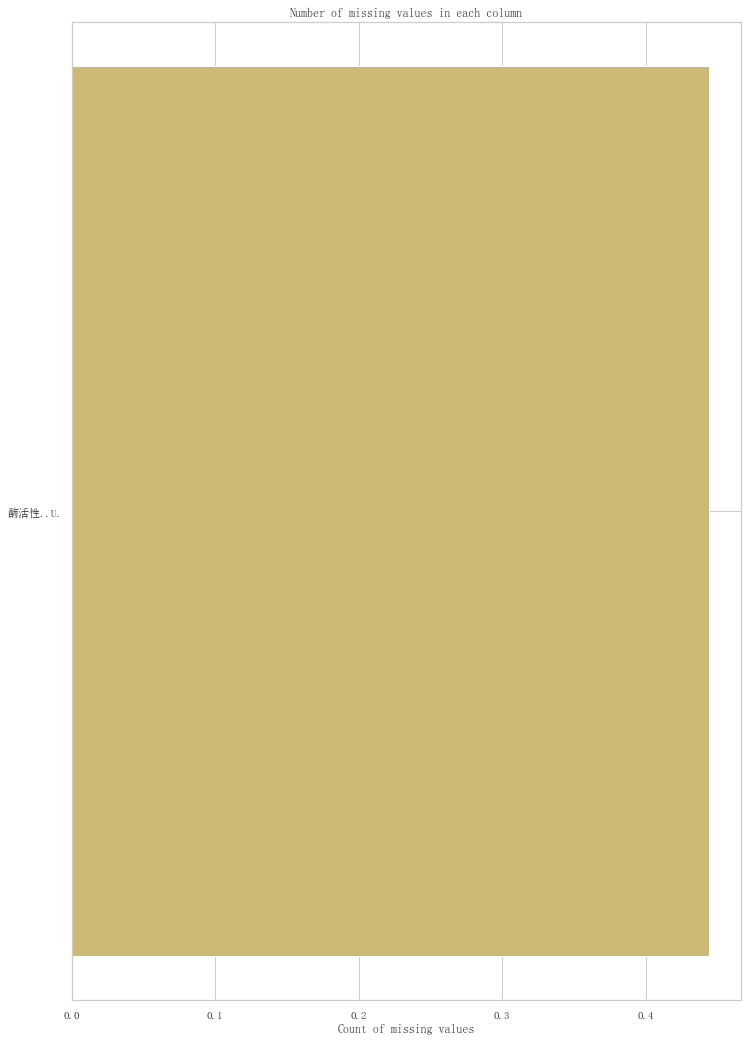

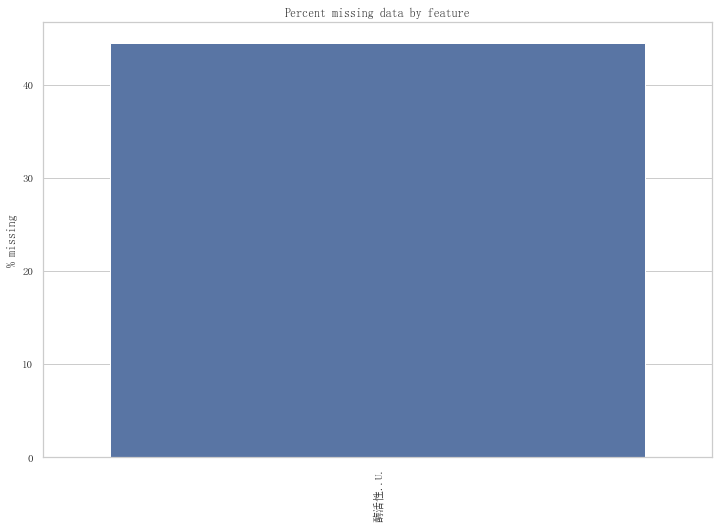

In [29]:
missing_df = (train.isnull().sum(axis=0)/train.shape[0]).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values('missing_count', axis=0,  ascending=True)
width = 0.8
ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12, 18))
ax.barh(ind, missing_df['missing_count'], color='y')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df['column_name'], rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.savefig(fname="NA1")

train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')
plt.savefig(fname="NA2")

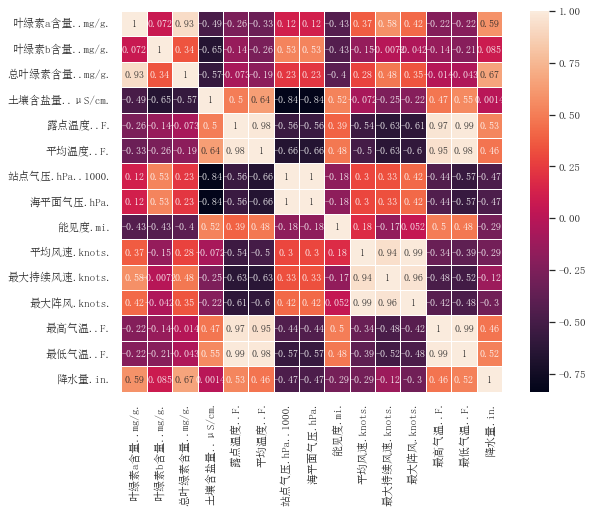

In [43]:
from matplotlib import rcParams

config = {
"font.family": 'serif', # 衬线字体
"font.serif": ['SimSun'], # 宋体
"mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

internal_chars = ['叶绿素a含量..mg/g.', '叶绿素b含量..mg/g.', '总叶绿素含量..mg/g.', '土壤含盐量..μS/cm.',
        '露点温度..F.', '平均温度..F.', '站点气压.hPa..1000.', '海平面气压.hPa.',
       '能见度.mi.', '平均风速.knots.', '最大持续风速.knots.', '最大阵风.knots.', '最高气温..F.',
       '最低气温..F.', '降水量.in.']

corrmat = train[internal_chars].corr()

f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)
plt.savefig(fname="heatmapR")

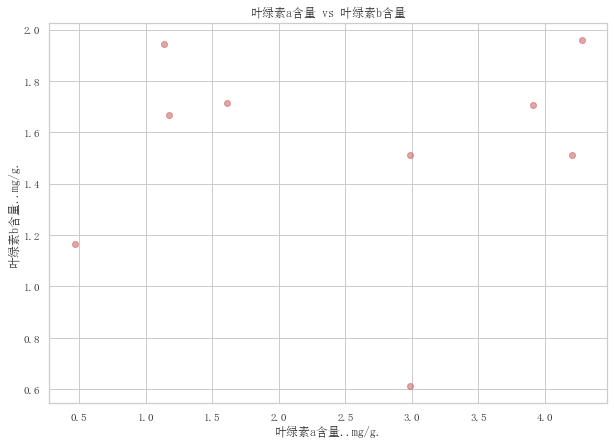

In [44]:
f, ax = plt.subplots(figsize=(10, 7))
ind = train[train['叶绿素a含量..mg/g.'] > 2000].index
plt.scatter(x=train.drop(ind)['叶绿素a含量..mg/g.'], y=train.drop(ind)['叶绿素b含量..mg/g.'], c='r', alpha=0.5)
ax.set(title='叶绿素a含量 vs 叶绿素b含量', xlabel='叶绿素a含量..mg/g.', ylabel='叶绿素b含量..mg/g.')
plt.savefig(fname='scatterR')

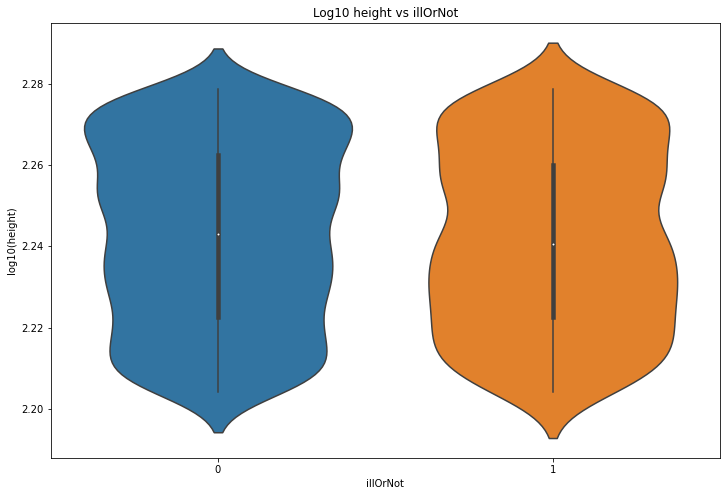

In [54]:
f, ax = plt.subplots(figsize=(12, 8))
ind = train[train['illOrNot'].isnull()].index
train['height_log10'] = np.log10(train['height'])
sns.violinplot(x="illOrNot", y="height_log10", data=train.drop(ind), inner="box")
# sns.swarmplot(x="state", y="price_doc_log10", data=train_df.dropna(), color="w", alpha=.2);
ax.set(title='Log10 height vs illOrNot', xlabel='illOrNot', ylabel='log10(height)')
plt.savefig(fname='height violin')